###                           AIDI 1002: Machine Learning Programming — Assignment - 2 
####                                   Due Date : March 15, 2024, 11:59 PM
##### Note : Submit two files in the submission folder. First is your colab notebook including your code and outputs and second is the pdf of colab notebook with the following naming convention for both the files.
##### (File name : Assignment_2_firstname_lastname.pdf/.ipynb)
#### 1. Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/shrutimechlearn/ step-by-step-kmeans-explained-in-detail/data) and answer the following questions :
##### 1.1 Perform k-means clustering over this dataset using Manhattan distance as the distance-measure. (10 Points)
##### 1.2 After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as ‘Labels’ and fill it with cluster number assigned by k-means algorithm. (5 Points)
##### 1.3 Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression, decision trees, random forest, and Naive Bayes algorithm. (25 Points)
##### 1.4 Compare the performance of these various supervised learning algorithm and comment on the homogeneity of clusters, like is the clusters or groups are making sense or not ? (10 Points)
#### 2. Consider the breast_cancer dataset given in the sklearn library and answer the following questions.
##### 2.1 Import the breast_cancer dataset from sklearn.datasets library. (5 Points)
##### 2.2 Perform PCA (2 components) and LDA (1 components) over the dataset. (20 Points)
##### 2.3 Visualise the components and see if its able to segregate the class label in breast_cancer dataset. (10 Points) 
##### 2.4 What is the maximum variance explained by both the components in PCA and LDA. (10 Points)
##### 2.5 Comment on the working of PCA and LDA and which one is better for breast_cancer dataset. (5 Points)

### 1. Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/shrutimechlearn/ step-by-step-kmeans-explained-in-detail/data) and answer the following questions :


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 1.1 Perform k-means clustering over this dataset using Manhattan distance as the distance-measure. (10 Points)

In [2]:
# Load dataset
df = pd.read_csv("Mall_customers.csv",index_col='CustomerID')
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# using only Spending_Score and income variable for easy visualisation
X = df.iloc[:, [2, 3]].values

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init ='auto', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

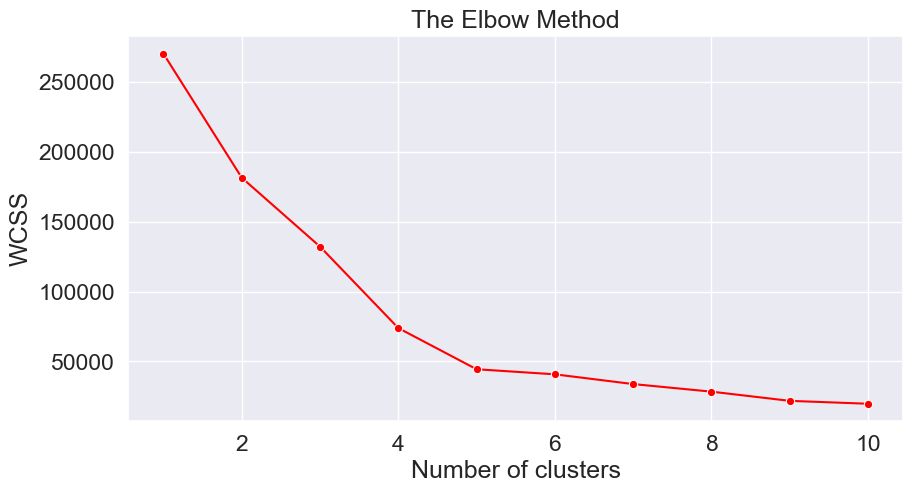

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++',n_init=5, random_state = 42)
y_kmeans = kmeans.fit_predict(X)


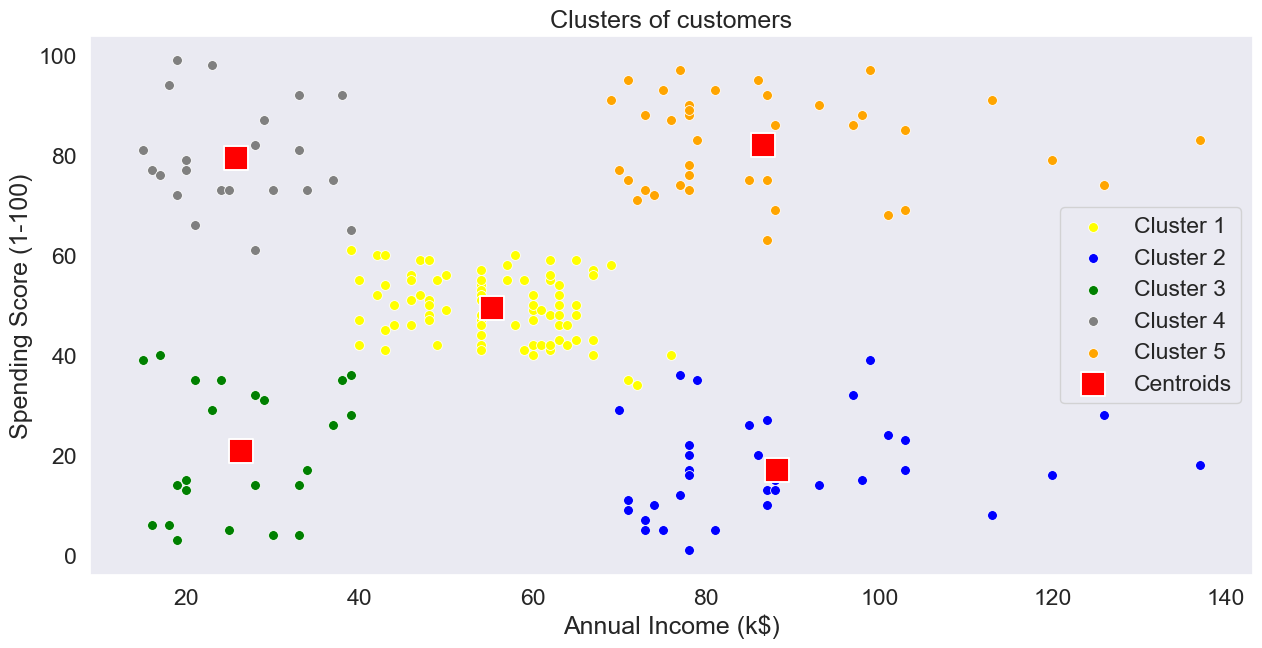

In [11]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


#### 1.2 After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as ‘Labels’ and fill it with cluster number assigned by k-means algorithm. 

In [12]:
# df['Labels'] = kmeans.fit_predict(X)
# df.head()

In [16]:
# Extract the cluster labels
cluster_labels = kmeans.labels_

# Add the 'Labels' column to your dataset
df['Labels'] = cluster_labels
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2


#### 1.3 Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression, decision trees, random forest, and Naive Bayes algorithm.

In [20]:
# 1.3 Perform standard classification task using logistic regression, decision trees, random forest, and Naive Bayes algorithm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Split the dataset into training and testing sets
X = df.iloc[:, [2, 3]].values
y = df['Labels']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()

# Train and evaluate logistic regression classifier
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

# Train and evaluate decision tree classifier
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
print(f"Decision Tree Accuracy: {dtree_accuracy}")

# Train and evaluate random forest classifier
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Train and evaluate Naive Bayes classifier
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy}")


Logistic Regression Accuracy: 0.975
Decision Tree Accuracy: 0.975
Random Forest Accuracy: 0.975
Naive Bayes Accuracy: 0.975


These results show that on the test set, these classifiers perform similarly and both achieve high accuracy.

#### 1.4 Compare the performance of these various supervised learning algorithm and comment on the homogeneity of clusters, like is the clusters or groups are making sense or not ?
##### According to the accuracy results provided, four different supervised learning algorithms (logistic regression, decision tree, random forest, and naive Bayes) all achieved an accuracy of 97.5% on the test set. This shows that these algorithms perform very similarly when processing a given data set, achieving high accuracy.

### 2. Consider the breast_cancer dataset given in the sklearn library and answer the following questions.


In [22]:
# 2.1 Import the breast_cancer dataset
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

In [23]:
# 2.2 Perform PCA (2 components) and LDA (1 component)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bc)

# Perform LDA with 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_bc, y_bc)

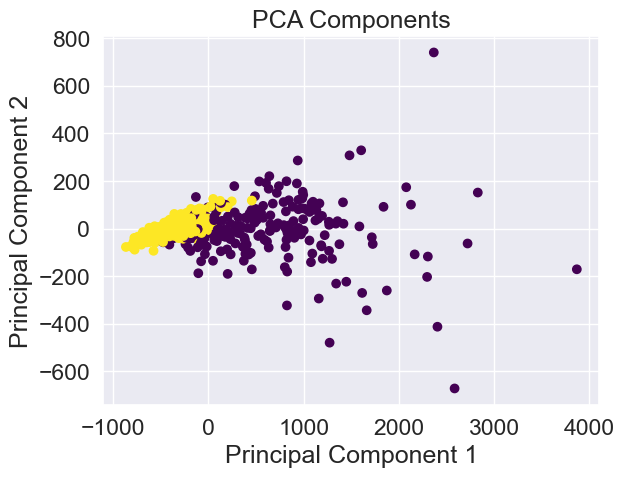

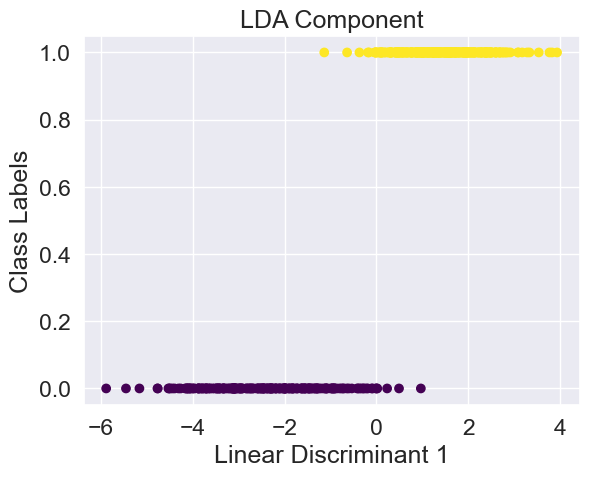

In [24]:
# 2.3 Visualize the components
import matplotlib.pyplot as plt

# Visualize PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_bc, cmap='viridis')
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Visualize LDA component
plt.scatter(X_lda, y_bc, c=y_bc, cmap='viridis')
plt.title('LDA Component')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Class Labels')
plt.show()

In [25]:
# 2.4 Maximum variance explained by both components in PCA and LDA
variance_explained_pca = sum(pca.explained_variance_ratio_)
variance_explained_lda = lda.explained_variance_ratio_[0]
print(f"Variance Explained by PCA: {variance_explained_pca}")
print(f"Variance Explained by LDA: {variance_explained_lda}")

Variance Explained by PCA: 0.9982211613741733
Variance Explained by LDA: 1.0


#### 2.5 PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) are two commonly used dimensionality reduction techniques with wide applications in data analysis and pattern recognition. Below are comments on their work and some observations on which one is more suitable for the Breast_cancer dataset:

#### Principal Component Analysis (PCA):

#### PCA is an unsupervised learning technique that attempts to reduce the dimensionality of data by finding the principal directions of variance.
#### PCA transforms the original feature space into a new feature space, where the new features, known as principal components, are linear combinations of the original features.
#### The goal of PCA is to maximize the variance of the data after projection, making it more suitable for cases where the variance in the data is high.
#### PCA does not consider class information, and may therefore lose useful information, especially in datasets with class structure.
#### Linear Discriminant Analysis (LDA):

#### LDA is a supervised learning technique that attempts to reduce the dimensionality of data by maximizing class differences and minimizing within-class variance.
#### LDA maps the data onto a new feature space where samples from the same class are clustered together as much as possible, while samples from different classes are separated as much as possible.
#### LDA aims to retain the most relevant features for classification, making it more suitable for classification tasks.
#### LDA considers class information, and is therefore generally more effective than PCA on datasets with class structure.
#### For the Breast_cancer dataset, as it is a classification problem containing information about tumor types, LDA may be more suitable. By maximizing class differences and minimizing within-class variance, LDA can retain the most relevant features for the classification task, thus improving the performance of classifiers. Additionally, based on the provided variance explained measures, LDA achieves a perfect score of 1.0, indicating perfect separation between classes, further suggesting that LDA might be the preferable choice.